In [1]:
import tensorflow as tf
import keras as keras
import keras.backend as K
from resnet_keras_feature_fusion_v12 import ResNet_v12
from resnet_keras_feature_fusion_v9 import ResNet_v9
from resnet_keras_feature_fusion_v8 import ResNet_v8
from resnet_keras_feature_fusion_v7 import ResNet_v7
from resnet_keras_feature_fusion_v6 import ResNet_v6
from resnet_keras_feature_fusion_v5 import ResNet_v5
from resnet_keras_feature_fusion_v4 import ResNet_v4
from resnet_keras_feature_fusion_v3 import ResNet_v3
from resnet_keras_feature_fusion_v2 import ResNet_v2
from resnet_keras import ResNet
from test_cifar_iterative import attack_iterative
from test_cifar_jsma import attack_jsma
from test_cifar_optimization import attack_optimization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import cifar10
import time
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [3]:
resnet_lessdiv = ResNet_v12(x_train=x_train, y_train=y_train, x_val=x_test, y_val=y_test, load_weights=False)
resnet_lessdiv.construct()
model_lessdiv = resnet_lessdiv._model
model_lessdiv.load_weights('models/resnet_32_fusion_diversity_lessdiv_strongforhigher321v2_avg_weight_best.h5')

In [4]:
model_lessdiv.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [4]:
exit4 = keras.models.Model(model_lessdiv.inputs, model_lessdiv.get_layer('conv2d_34').output)
exit5 = keras.models.Model(model_lessdiv.inputs, model_lessdiv.get_layer('add_1').output)
exit6 = keras.models.Model(model_lessdiv.inputs, model_lessdiv.get_layer('add_2').output)

In [5]:
pred1 = exit6.predict(x_train[1:2])
pred2 = exit5.predict(x_train[1:2])
pred3 = exit4.predict(x_train[1:2])

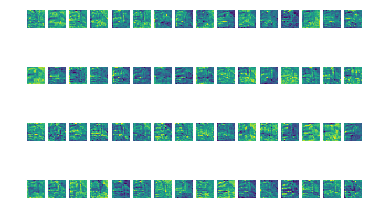

In [6]:
for _ in range(64):
    show_img = pred1[0, :, :, _]
    plt.subplot(4, 16, _ + 1)
    plt.imshow(show_img)
    plt.axis('off')

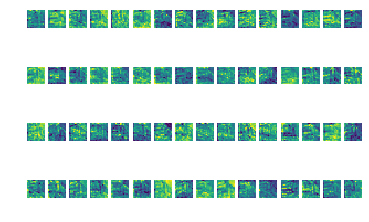

In [7]:
for _ in range(64):
    show_img = pred2[0, :, :, _]
    plt.subplot(4, 16, _ + 1)
    plt.imshow(show_img)
    plt.axis('off')

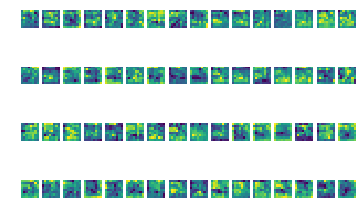

In [8]:
for _ in range(64):
    show_img = pred3[0, :, :, _]
    plt.subplot(4, 16, _ + 1)
    plt.imshow(show_img)
    plt.axis('off')

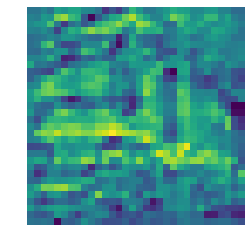

In [23]:
plt.imshow(pred1[0, :, :, 35])
plt.axis('off')
plt.savefig('p1_2.png')

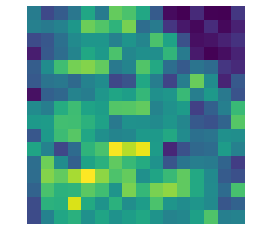

In [24]:
plt.imshow(pred2[0, :, :, 38])
plt.axis('off')
plt.savefig('p2_2.png')

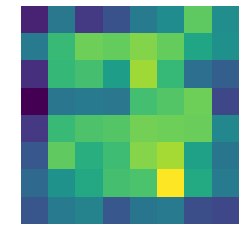

In [32]:
plt.imshow(pred3[0, :, :, 46])
plt.axis('off')
plt.savefig('p3_3.png')

In [5]:
exit1 = keras.models.Model(model_lessdiv.inputs, model_lessdiv.get_layer('activation_12').output)
exit2 = keras.models.Model(model_lessdiv.inputs, model_lessdiv.get_layer('activation_23').output)
exit3 = keras.models.Model(model_lessdiv.inputs, model_lessdiv.get_layer('activation_33').output)

In [6]:
pred1 = exit1.predict(x_train[1:2])
pred2 = exit2.predict(x_train[1:2])
pred3 = exit3.predict(x_train[1:2])

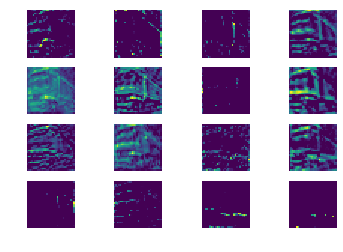

In [7]:
for _ in range(16):
    show_img = pred1[0, :, :, _]
    plt.subplot(4, 4, _ + 1)
    plt.imshow(show_img)
    plt.axis('off')

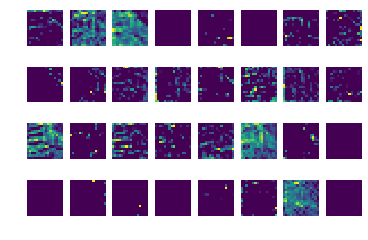

In [9]:
for _ in range(32):
    show_img = pred2[0, :, :, _]
    plt.subplot(4, 8, _ + 1)
    plt.imshow(show_img)
    plt.axis('off')

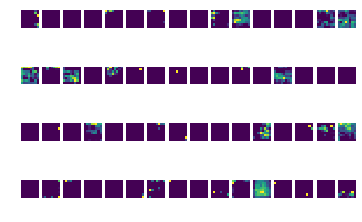

In [10]:
for _ in range(64):
    show_img = pred3[0, :, :, _]
    plt.subplot(4, 16, _ + 1)
    plt.imshow(show_img)
    plt.axis('off')

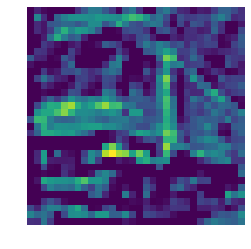

In [20]:
plt.imshow(pred1[0, :, :, 5])
plt.axis('off')
plt.savefig('p1.png')

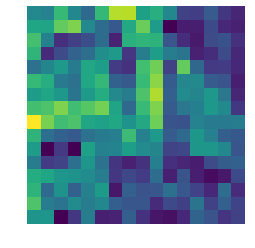

In [21]:
plt.imshow(pred2[0, :, :, 21])
plt.axis('off')
plt.savefig('p2.png')

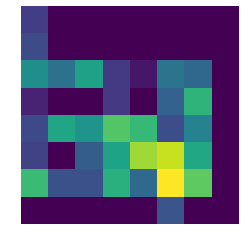

In [22]:
plt.imshow(pred3[0, :, :, 18])
plt.axis('off')
plt.savefig('p3.png')